In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/SeoulBikeData.csv


# Data Manipulation

## Importing libraries

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [3]:
df = pd.read_csv('/kaggle/input/dataset/SeoulBikeData.csv', encoding= 'latin1')
print(df)

            Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2      

In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


## Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')

df["Weekday"] = df["Date"].dt.day_name()
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

df.drop("Date", axis=1, inplace=True)

## Dataset View

In [7]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday,Day,Month,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,1,12,2017


# Dataset Visualization

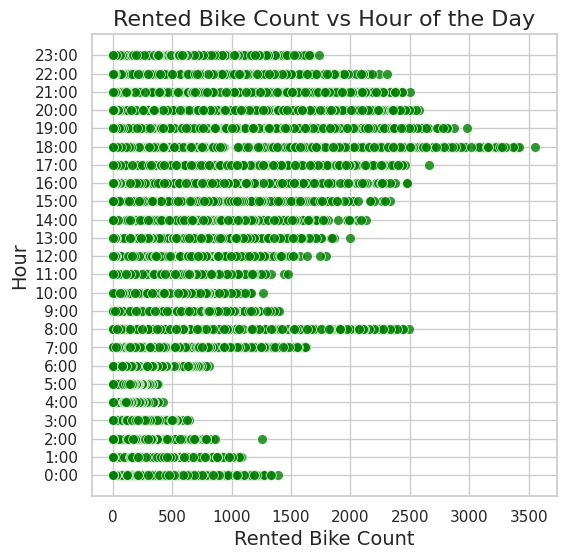

In [8]:
# @title Rented Bike Count vs Hour
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(6, 6))

# Scatter plot with enhanced aesthetics
sns.scatterplot(data=df, x='Rented Bike Count', y='Hour', s=50, alpha=0.8, color='green')

# Set plot labels and title
plt.title('Rented Bike Count vs Hour of the Day', fontsize=16)
plt.xlabel('Rented Bike Count', fontsize=14)
plt.ylabel('Hour', fontsize=14)

# Customize the y-axis ticks to represent hours of the day
plt.yticks(range(24), [f'{hour}:00' for hour in range(24)])

plt.show()


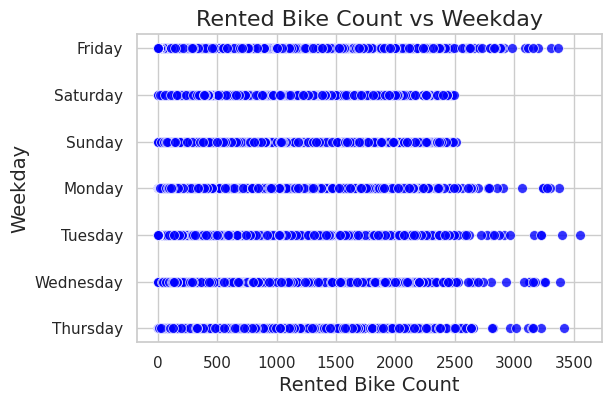

In [9]:
# @title Rented Bike Count vs Weekday

import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for enhanced aesthetics

# Set seaborn style for improved aesthetics
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(6, 4))  # Adjust the figure size

# Scatter plot with enhanced aesthetics
sns.scatterplot(data=df, x='Rented Bike Count', y='Weekday', s=50, alpha=0.8, color='blue')

# Set plot labels and title
plt.title('Rented Bike Count vs Weekday', fontsize=16)
plt.xlabel('Rented Bike Count', fontsize=14)
plt.ylabel('Weekday', fontsize=14)

plt.show()

### Scatter Plot of Rented Bike Count vs Rainfall


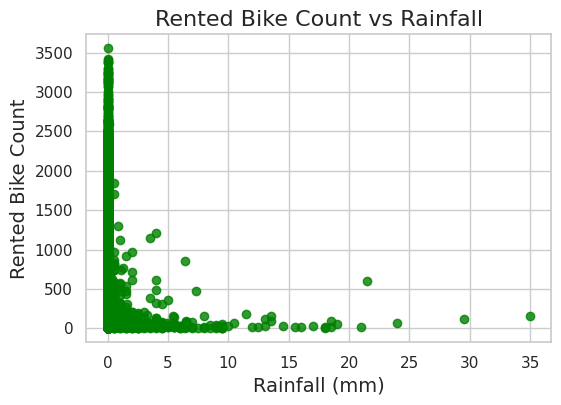

In [10]:
plt.figure(figsize=(6, 4))  # Adjust the figure size

# Scatter plot
plt.scatter(df['Rainfall(mm)'], df['Rented Bike Count'], alpha=0.8, color='green')

# Set plot labels and title
plt.title('Rented Bike Count vs Rainfall', fontsize=16)
plt.xlabel('Rainfall (mm)', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)

plt.show()


### Histogram and KDE Plot of Rented Bike Count vs Humidity

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


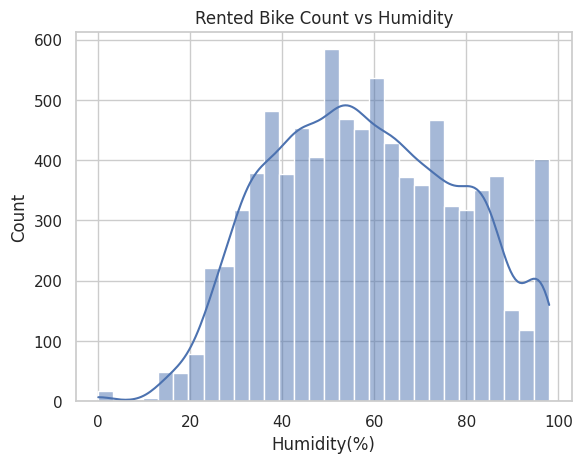

In [11]:
sns.histplot(data=df, x='Humidity(%)', bins=30, kde=True)
plt.title('Rented Bike Count vs Humidity')
plt.show()

### Joint Scatter Plot of Rented Bike Count vs Visibility

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


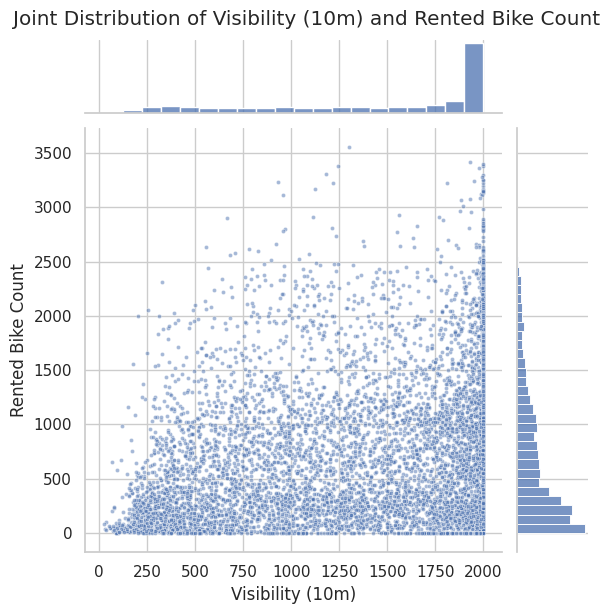

In [12]:
sns.jointplot(data=df, x='Visibility (10m)', y='Rented Bike Count', kind='scatter', marker='.', alpha=0.5)
plt.suptitle('Joint Distribution of Visibility (10m) and Rented Bike Count', y=1.02)
plt.show()

### Barplot of Rented Bike Count vs Holiday

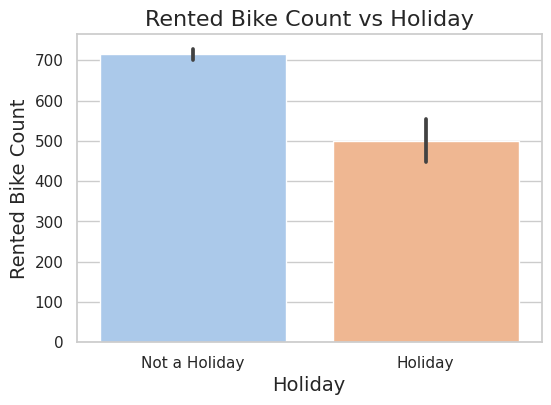

In [13]:
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(6, 4))  # Adjust the figure size

# Bar plot with enhanced aesthetics
colors = sns.color_palette("pastel")  # Custom color palette
sns.barplot(data=df, x="Holiday", y="Rented Bike Count", palette=colors)

# Set plot labels and title
plt.title('Rented Bike Count vs Holiday', fontsize=16)
plt.xlabel('Holiday', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)

# Customize x-axis labels
plt.xticks(ticks=[0, 1], labels=['Not a Holiday', 'Holiday'], rotation=0)

plt.show()

### Barplot of Total Rented Bike vs Month

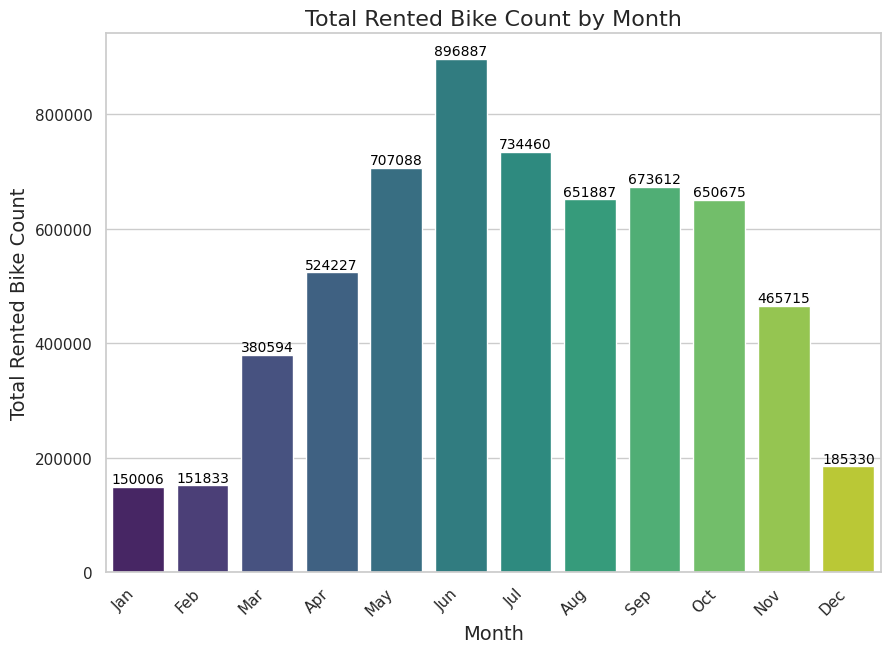

In [14]:
plt.figure(figsize=(10, 7))

# Grouping the data by month and summing the rented bike counts
Month = df.groupby("Month").sum().reset_index()

# Custom color palette
colors = sns.color_palette("viridis", n_colors=len(Month))

# Creating the bar plot
sns.barplot(x="Month", y="Rented Bike Count", data=Month, palette=colors)

# Adding title and labels
plt.title('Total Rented Bike Count by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Rented Bike Count', fontsize=14)

# Customizing x-axis labels
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=months_labels, rotation=45, ha='right')

# Adding data labels on each bar
for i, count in enumerate(Month["Rented Bike Count"]):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.show()


### Box Plot of Continuous Variables

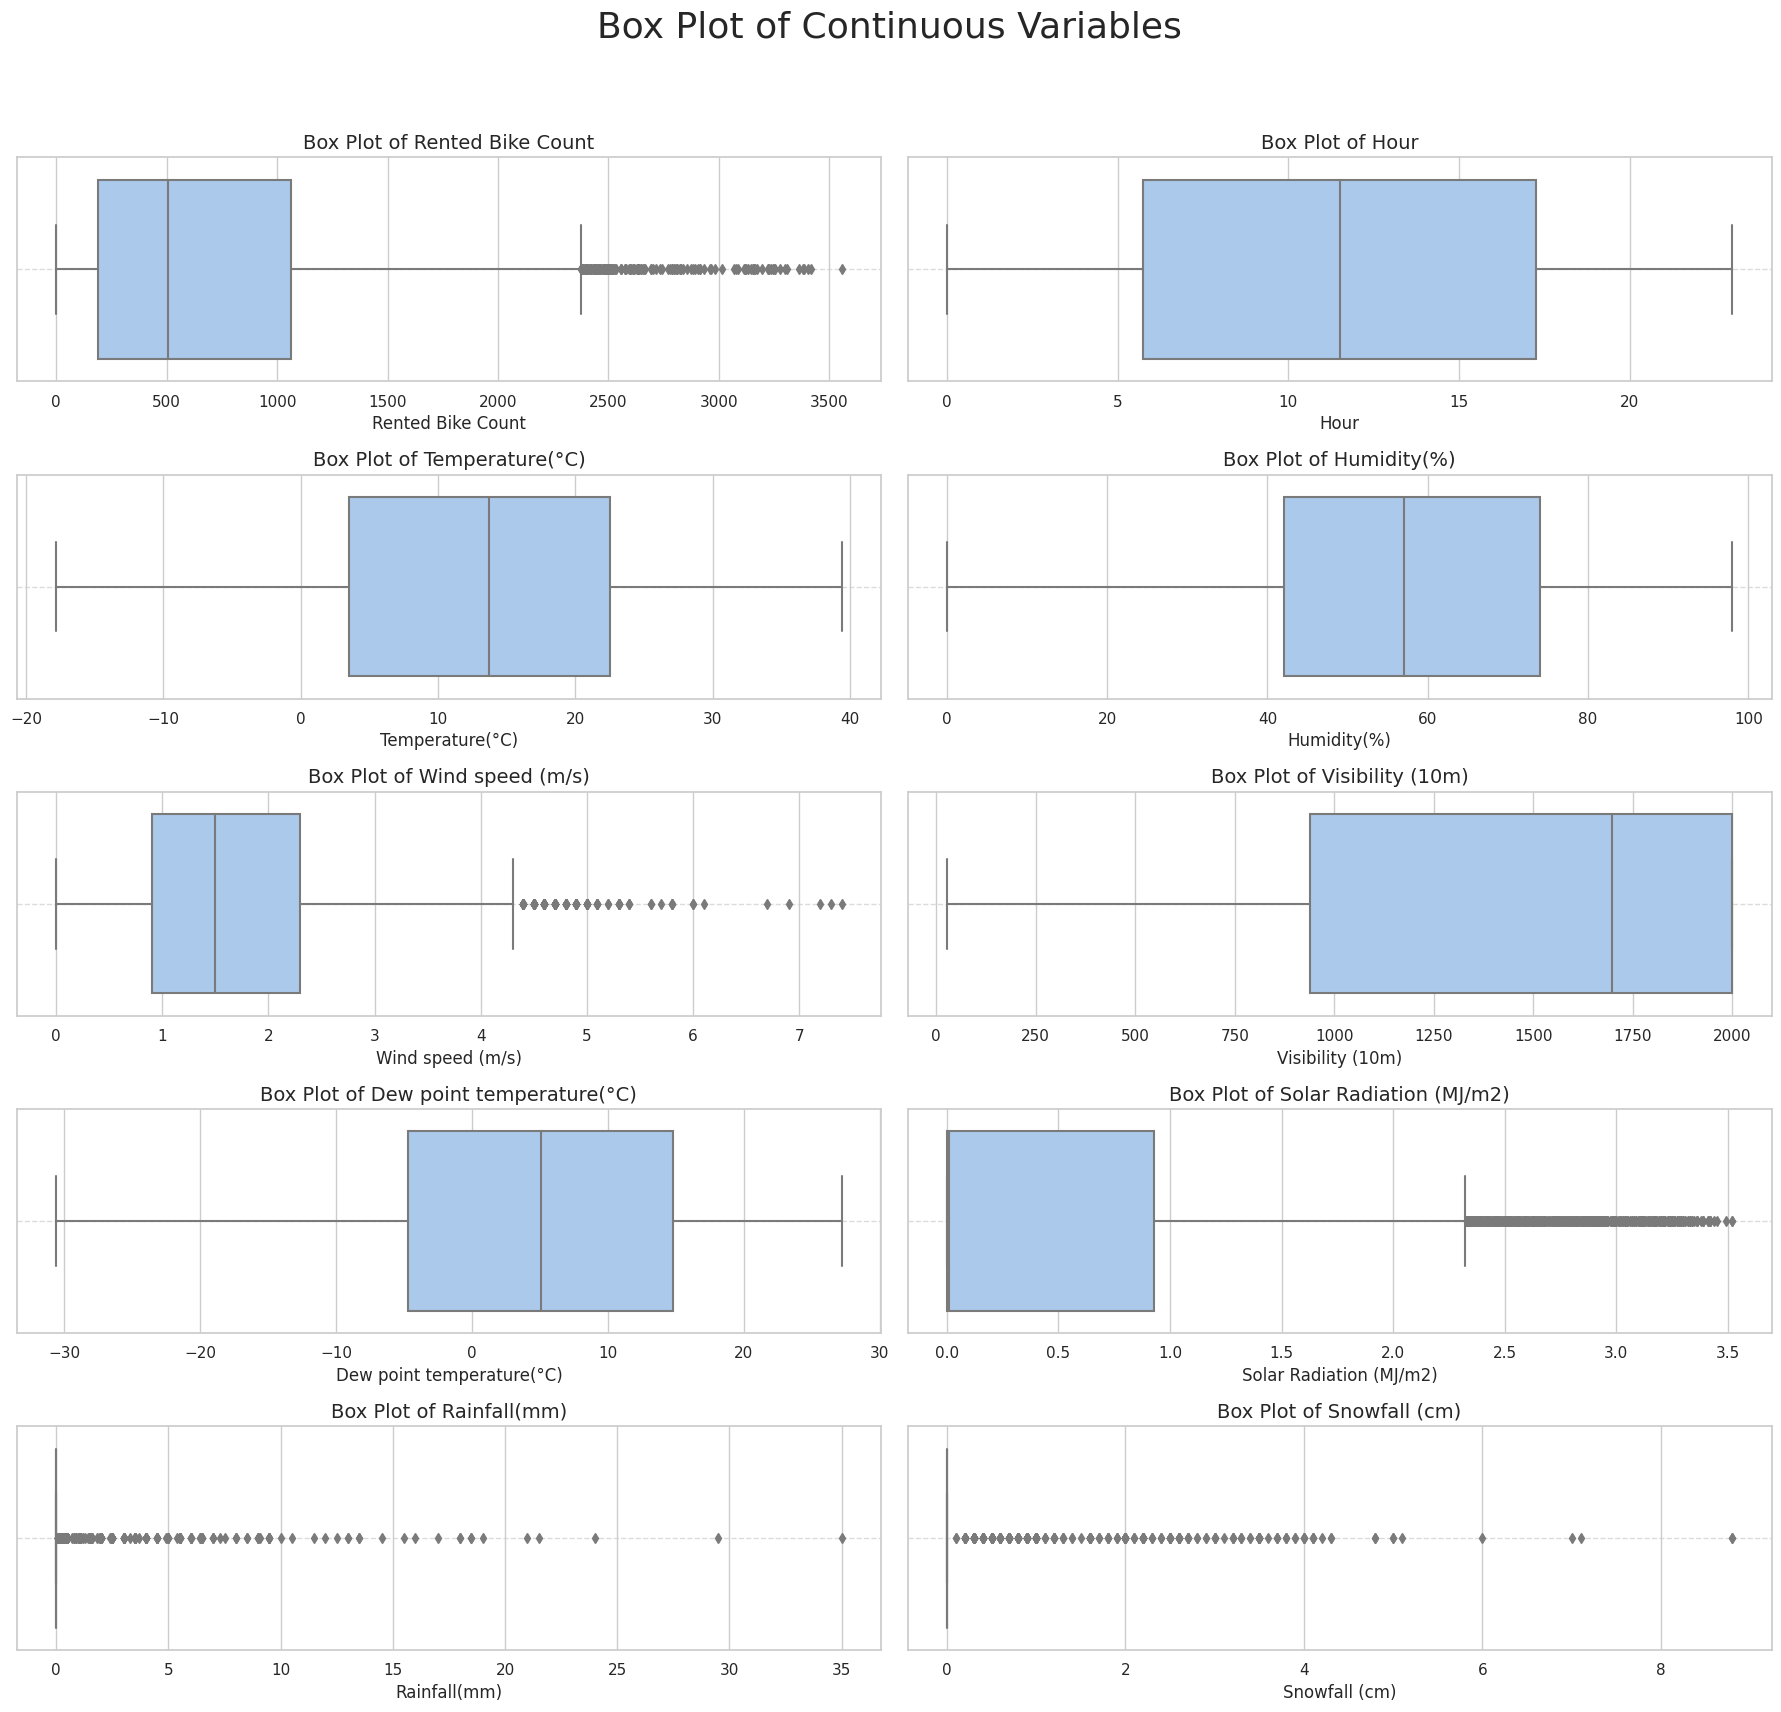

In [15]:
# Set the color palette
sns.set_palette("pastel")

# Create a figure and axes
plt.figure(figsize=(18, 18))

# Loop over each continuous column and create a box plot
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    ax = plt.subplot(5, 2, i+1)
    sns.boxplot(data=df, x=col, ax=ax)
    
    # Add horizontal grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Set title and axis labels
    ax.set_title(f'Box Plot of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('')

# Adjust layout and add super title
plt.suptitle('Box Plot of Continuous Variables', fontsize=26)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()